In [7]:
# Load twitter data

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("short_twitter_2.csv")

In [10]:
df.head()

,0,1,2,3,4,5
0,4,2011054852,Tue Jun 02 18:24:20 PDT 2009,NO_QUERY,chzchz,can't wait for new moon!
1,0,2213804654,Wed Jun 17 15:52:05 PDT 2009,NO_QUERY,timelpatel,@DallasGeek83 thanks. they should have made it...
2,0,1965690703,Fri May 29 16:22:03 PDT 2009,NO_QUERY,stormi_weather,I have to work tomorrow too sheli
3,4,1989308420,Mon Jun 01 01:04:12 PDT 2009,NO_QUERY,katehutson,@chictopia yes! And adopt one from petfinder.c...
4,4,1880090577,Fri May 22 00:04:12 PDT 2009,NO_QUERY,jadiebabesxx,is up and ready to have a gooood day with her ...


In [11]:
# Let's rename columns
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,4,2011054852,Tue Jun 02 18:24:20 PDT 2009,NO_QUERY,chzchz,can't wait for new moon!
1,0,2213804654,Wed Jun 17 15:52:05 PDT 2009,NO_QUERY,timelpatel,@DallasGeek83 thanks. they should have made it...
2,0,1965690703,Fri May 29 16:22:03 PDT 2009,NO_QUERY,stormi_weather,I have to work tomorrow too sheli
3,4,1989308420,Mon Jun 01 01:04:12 PDT 2009,NO_QUERY,katehutson,@chictopia yes! And adopt one from petfinder.c...
4,4,1880090577,Fri May 22 00:04:12 PDT 2009,NO_QUERY,jadiebabesxx,is up and ready to have a gooood day with her ...


In [12]:
# keep only the columns we need
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)


In [13]:
# Let's check available labels
set(df.sentiment) # IN this case 0 = Negative and 4 = positive

{0, 4}

In [14]:
# Let's map it
label_map = {"0":"Negative", "4":"Positive"}

df["sentiment"] = df.sentiment.apply(lambda x: label_map[str(x)])
df.head()

,sentiment,text
0,Positive,can't wait for new moon!
1,Negative,@DallasGeek83 thanks. they should have made it...
2,Negative,I have to work tomorrow too sheli
3,Positive,@chictopia yes! And adopt one from petfinder.c...
4,Positive,is up and ready to have a gooood day with her ...


Text(0.5, 1.0, 'Sentiment Distribution')

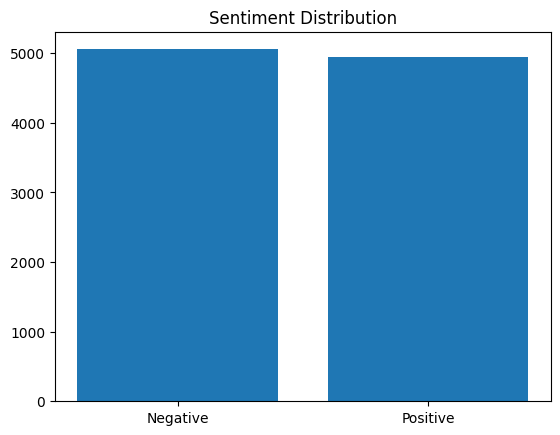

In [15]:
# Let's check distribution
import matplotlib.pyplot as plt
val_count = df.sentiment.value_counts()

plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Distribution")

With this we can see that we have a balanced dataset

# Text processing

In [16]:
# From the data we saw above we need to apply some cleaning steps

# 1. Remove stop words

In [17]:
import nltk
nltk.download("stopwords") # do it at least once

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# As seen in the slides
from nltk.corpus import stopwords
en_stops = set(stopwords.words("english"))

In [19]:
en_stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# 2. Word stemming

In [20]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

# 3. Remove certain words using regex

In [21]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# 4. Apply preprocessing steps

In [22]:
import re
def preprocess(text):
    # Replacing specific words with regex with ' '
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()

    # variable to save the results
    tokens = []
    for token in text.split(): # Iterate over each word, so we need the split command
        if token not in en_stops: # Check if the word exists inside the stopwords list
            tokens.append(ps.stem(token))
    return " ".join(tokens)

In [23]:
df.text = df.text.apply(lambda x: preprocess(x)) # This takes a couple minutes to run aprox 5 min

In [24]:
# Let's take a look to some results
df.head()

,sentiment,text
0,Positive,wait new moon
1,Negative,thank made alittl thinner least
2,Negative,work tomorrow sheli
3,Positive,ye adopt one petfind com found loveavl pup
4,Positive,readi gooood day besti


# Let's perform some vizualization with WordCloud

In [25]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud  # This takes 2 min to run

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

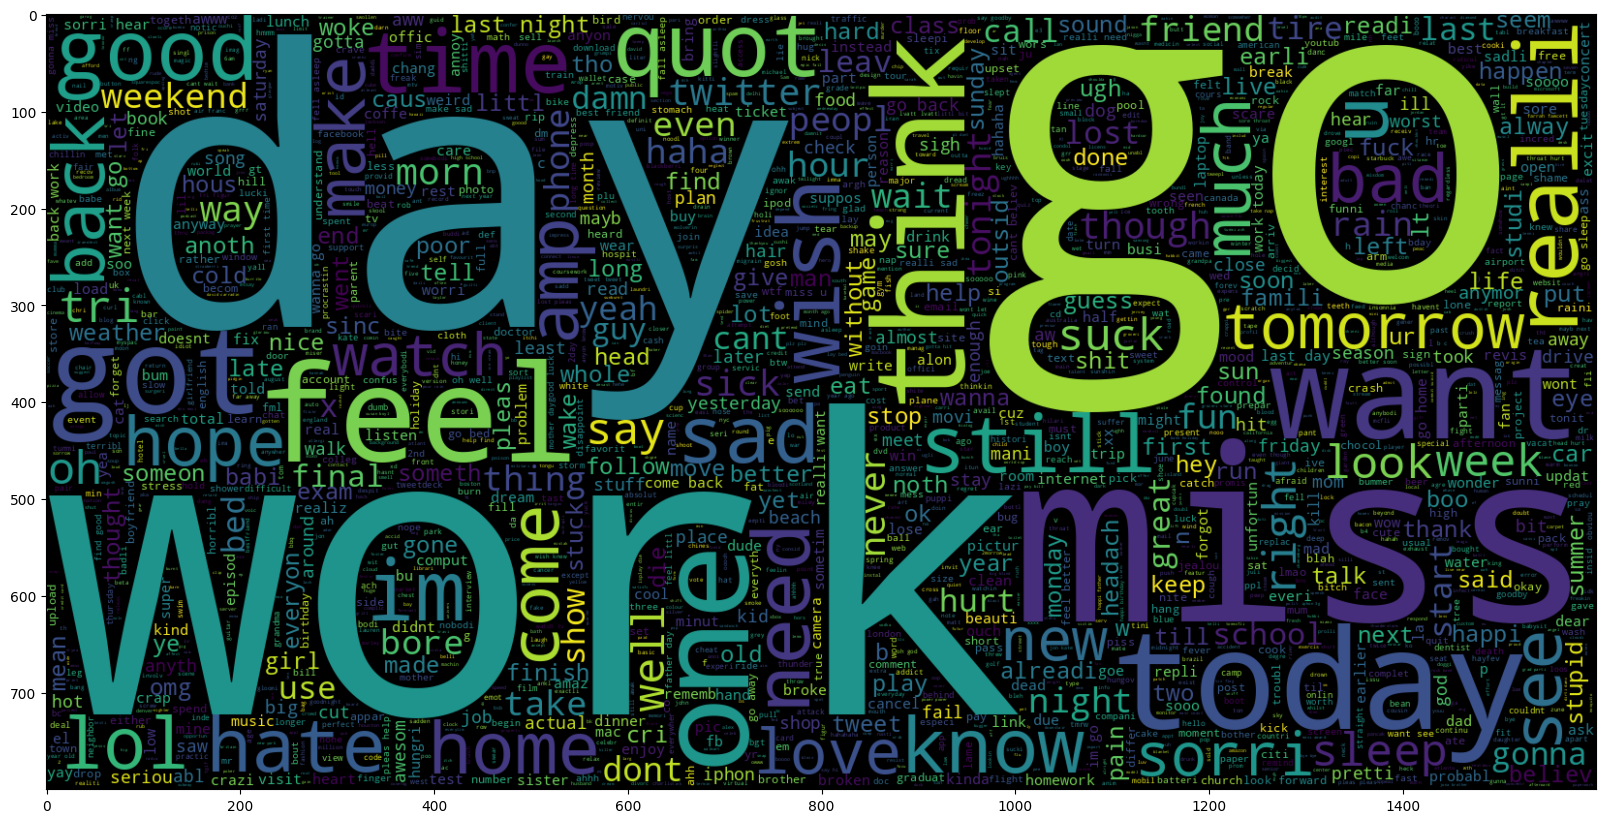

In [ ]:
# For negative words # This takes 2 min to run
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

# Let's divide into train test data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 8000
Test Data size 2000


In [ ]:
train_data.head(10)


,sentiment,text
4989,Positive,ten minut go home
4498,Positive,edit charact length want read tweet
8876,Positive,figur dumb look
670,Positive,otaliarock go somewher
9552,Positive,pleas follow ddlovato come mexico pleas follow...
1757,Positive,doubt except there realli whole lot tractor mi...
1781,Negative,want say quot goodby quot
5270,Negative,mayb
8130,Negative,ugh im tire
4426,Negative,go tri finish watch googl wave present googl i...


# Tokenization

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.

tokenizer create tokens for every word in the data corpus and map them to a index using dictionary.

word_index contains the index for each word

vocab_size represents the total number of word in the data corpus

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 9763


One requirement for text model to work properly is to have the same amount of token in order to ensure the same amount of inputs. For the shorter sentences we pad with zeros. If bigger tey are truncated.
More info here https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences


In [ ]:
from keras.utils import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = 30)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = 30)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8000, 30)
Testing X Shape: (2000, 30)


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (8000, 1)
y_test shape: (2000, 1)


# Word to vec

In [ ]:
# Since we cannot use actual words in the model, we need to convert them into words.
# For  that we are going to use Glove

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-06-21 17:15:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-06-21 17:15:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-06-21 17:15:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import numpy as np

f = open("glove.6B.50d.txt") # 50 dimensions vector

embeddings_index = {}

for line in f:
    values = line.split()
    word = value = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
len(embeddings_index["the"]) # we confirm that the word 'the' as a 50 dim vector

50

In [ ]:
# This creates a matrix with the embbedings for each word in our vocabulary
embedding_matrix = np.zeros((vocab_size, 50))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(9763, 50)

# Model definition

![Sequence_model.png](attachment:Sequence_model.png)

In [ ]:
# In this example, we need to provide a special input layer because we are passing ebeddings

In [ ]:
import tensorflow as tf
# This layer perform the selection of the embeddings to us
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          50,
                                          weights=[embedding_matrix],
                                          input_length=30,
                                          trainable=False) # This is False because we already have our embeddings no need to create them

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras import Sequential

In [ ]:
model = Sequential([
    embedding_layer,
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='softmax')
])

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train[:10000], y_train[:10000], batch_size=500, epochs=10, validation_split=0.3)

Epoch 1/10
12/12 [==============================] - 7s 287ms/step - loss: 0.6652 - accuracy: 0.4879 - val_loss: 0.6317 - val_accuracy: 0.5133
Epoch 2/10
12/12 [==============================] - 3s 232ms/step - loss: 0.6315 - accuracy: 0.4879 - val_loss: 0.6296 - val_accuracy: 0.5133
Epoch 3/10
12/12 [==============================] - 2s 208ms/step - loss: 0.6229 - accuracy: 0.4879 - val_loss: 0.6304 - val_accuracy: 0.5133
Epoch 4/10
12/12 [==============================] - 3s 214ms/step - loss: 0.6034 - accuracy: 0.4879 - val_loss: 0.6192 - val_accuracy: 0.5133
Epoch 5/10
12/12 [==============================] - 3s 215ms/step - loss: 0.5859 - accuracy: 0.4879 - val_loss: 0.6069 - val_accuracy: 0.5133
Epoch 6/10
12/12 [==============================] - 3s 288ms/step - loss: 0.5652 - accuracy: 0.4879 - val_loss: 0.6335 - val_accuracy: 0.5133
Epoch 7/10
12/12 [==============================] - 3s 213ms/step - loss: 0.5514 - accuracy: 0.4879 - val_loss: 0.6309 - val_accuracy: 0.5133
Epoch 

In [ ]:
# evaluate the model
loss = model.evaluate(x_test[:1000], y_test[:1000])

32/32 [==============================] - 0s 7ms/step - loss: 0.6362 - accuracy: 0.4770


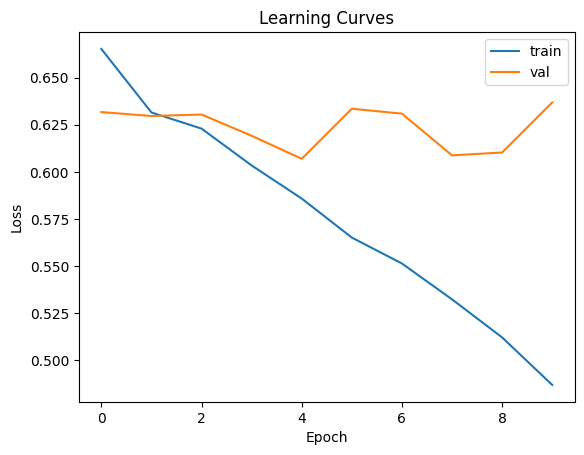

In [ ]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.epoch, history.history["loss"], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            488150    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 517,655
Trainable params: 29,505
Non-trainable params: 488,150
_________________________________________________________________


# Let's try to improve the model by adding

## 1. Dropout
## 2. Extra LSTM layer
## 3. Extra Dense Layer